# The Hoepner Exercises
#### My slight deviations from the exercises of Hoepner's excellent CFDS Course on AZEK

In [31]:
from __future__ import division, print_function, absolute_import

In [32]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [33]:
import os
key = os.environ.get('QUANDL_KEY')

In [34]:
quandl.ApiConfig.api_key = key
frequency='monthly'
start='2007-12-31'
end = '2017-05-31'
data = quandl.get(['WIKI/AAPL', 'WIKI/NDAQ'], collapse=frequency, trim_start=start, trim_end=end)
data.head()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,199.50,200.50,197.75,198.08,19261900.0,0.0,1.0,25.638531,25.767044,25.413631,...,49.26,49.49,1449800.0,0.0,1.0,44.879825,45.206553,44.707384,44.916128,1449800.0
2008-01-31,129.45,136.65,129.40,135.36,48059800.0,0.0,1.0,16.636129,17.561430,16.629704,...,41.45,46.27,3525200.0,0.0,1.0,38.118355,42.202464,37.619186,41.993721,3525200.0
2008-02-29,129.75,130.21,124.80,125.02,44838600.0,0.0,1.0,16.674683,16.733800,16.038539,...,40.75,41.51,5633800.0,0.0,1.0,38.653827,39.025934,36.983880,37.673640,5633800.0
2008-03-31,143.27,145.71,142.52,143.50,27430900.0,0.0,1.0,18.412192,18.725766,18.315806,...,38.08,38.66,2127500.0,0.0,1.0,35.096114,35.713268,34.560641,35.087038,2127500.0
2008-04-30,176.26,180.00,172.92,173.95,40697300.0,0.0,1.0,22.651867,23.132509,22.222630,...,36.20,36.45,2941500.0,0.0,1.0,34.678627,34.678627,32.854391,33.081286,2941500.0


In [35]:
data.columns

Index(['WIKI/AAPL - Open', 'WIKI/AAPL - High', 'WIKI/AAPL - Low',
       'WIKI/AAPL - Close', 'WIKI/AAPL - Volume', 'WIKI/AAPL - Ex-Dividend',
       'WIKI/AAPL - Split Ratio', 'WIKI/AAPL - Adj. Open',
       'WIKI/AAPL - Adj. High', 'WIKI/AAPL - Adj. Low',
       'WIKI/AAPL - Adj. Close', 'WIKI/AAPL - Adj. Volume', 'WIKI/NDAQ - Open',
       'WIKI/NDAQ - High', 'WIKI/NDAQ - Low', 'WIKI/NDAQ - Close',
       'WIKI/NDAQ - Volume', 'WIKI/NDAQ - Ex-Dividend',
       'WIKI/NDAQ - Split Ratio', 'WIKI/NDAQ - Adj. Open',
       'WIKI/NDAQ - Adj. High', 'WIKI/NDAQ - Adj. Low',
       'WIKI/NDAQ - Adj. Close', 'WIKI/NDAQ - Adj. Volume'],
      dtype='object')

In [36]:
data.describe()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,...,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,114.000000,1.140000e+02
mean,270.682761,273.196666,267.916329,270.178670,2.729450e+07,0.0,1.0,65.539889,66.048393,64.913010,...,36.114600,36.548947,1.951090e+06,0.0,1.0,34.403284,34.798806,34.007861,34.413595,1.951090e+06
std,178.558093,180.102301,176.910085,178.507795,1.687421e+07,0.0,0.0,37.432821,37.561552,37.134394,...,16.280077,16.415478,1.158745e+06,0.0,0.0,16.500981,16.601361,16.421684,16.556152,1.158745e+06
min,85.970000,87.740000,85.340000,85.350000,6.023900e+06,0.0,1.0,11.048343,11.275813,10.967379,...,17.770000,17.780000,2.358000e+05,0.0,1.0,16.336438,16.409044,16.127694,16.136770,2.358000e+05
25%,118.092500,119.402500,117.075000,117.445000,1.511132e+07,0.0,1.0,31.532260,31.860212,31.198686,...,23.110000,23.177500,1.123913e+06,0.0,1.0,21.366382,21.529992,21.046777,21.096667,1.123913e+06
50%,191.778000,193.170000,186.723350,188.625000,2.155055e+07,0.0,1.0,61.399595,61.845402,60.851646,...,30.915000,31.560000,1.659300e+06,0.0,1.0,28.750954,29.588110,28.420195,29.188881,1.659300e+06
75%,403.237500,408.567500,402.880000,404.945000,3.632489e+07,0.0,1.0,96.811955,97.012962,96.204859,...,48.332500,48.462500,2.532175e+06,0.0,1.0,46.082361,46.164043,45.375952,45.435271,2.532175e+06
max,678.750000,681.110000,666.750000,667.105000,8.374546e+07,0.0,1.0,153.347799,153.546991,151.764225,...,71.050000,71.210000,7.057200e+06,0.0,1.0,70.126121,70.278826,69.643376,70.057157,7.057200e+06


In [37]:
data = data[['WIKI/AAPL - Adj. Close', 'WIKI/NDAQ - Adj. Close']]
data.head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,25.456041,44.916128
2008-01-31,17.395647,41.993721
2008-02-29,16.066812,37.673640
2008-03-31,18.441750,35.087038
2008-04-30,22.354999,33.081286


In [38]:
np.log(data/data.shift(1)).head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [39]:
data.rename(columns={'WIKI/AAPL - Adj. Close': 'Apple', 'WIKI/NDAQ - Adj. Close': 'Nasdaq'}, inplace=True)

In [40]:
data_log = np.log(data/data.shift(1))
data_log.head()

,Apple,Nasdaq
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [41]:
model = sm.OLS(data_log['Apple'], data_log['Nasdaq'], missing='drop')
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Apple   R-squared (uncentered):                   0.061
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              7.302
Date:                Sun, 11 Aug 2019   Prob (F-statistic):                     0.00796
Time:                        18:28:59   Log-Likelihood:                          109.91
No. Observations:                 113   AIC:                                     -217.8
Df Residuals:                     112   BIC:                                     -215.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Plotting Nasdaq vs Apple
The $R^2$ value makes sense. We wouldn't expect the regression model to be overly explanatory looking at the below plot.

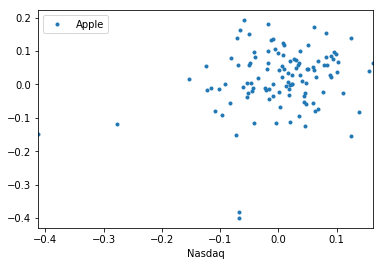

In [42]:
data_log.plot(y='Apple', x='Nasdaq', style='.');

# Project 2

In [43]:
frequency="monthly"
start="2007-12-31"
end="2017-12-31"
data = quandl.get(['WIKI/AAPL', 'WIKI/NDAQ'], collapse=frequency, trim_start=start, trim_end=end)
data = data[['WIKI/AAPL - Adj. Close', 'WIKI/NDAQ - Adj. Close']]
data.rename(columns={'WIKI/AAPL - Adj. Close': 'Apple', 'WIKI/NDAQ - Adj. Close': 'Nasdaq'}, inplace=True)
data.head()

,Apple,Nasdaq
Date,,
2007-12-31,25.456041,44.916128
2008-01-31,17.395647,41.993721
2008-02-29,16.066812,37.673640
2008-03-31,18.441750,35.087038
2008-04-30,22.354999,33.081286


In [44]:
tb3ms = pd.read_csv('TB3MS.csv')

In [45]:
ir_3m = tb3ms.rename(columns={'DATE': 'Date', 'TB3MS': 'ir_3m'})
ir_3m.head()

,Date,ir_3m
0,2008-01-01,2.75
1,2008-02-01,2.12
2,2008-03-01,1.26
3,2008-04-01,1.29
4,2008-05-01,1.73


In [46]:
ir_3m["Date"] = pd.to_datetime(ir_3m['Date']) - pd.tseries.offsets.MonthEnd()
ir_3m.head()

,Date,ir_3m
0,2007-12-31,2.75
1,2008-01-31,2.12
2,2008-02-29,1.26
3,2008-03-31,1.29
4,2008-04-30,1.73


In [47]:
ir_3m = ir_3m.set_index('Date')
ir_3m.head()

,ir_3m
Date,
2007-12-31,2.75
2008-01-31,2.12
2008-02-29,1.26
2008-03-31,1.29
2008-04-30,1.73


In [48]:
ir_3m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-12-31 to 2017-12-31
Data columns (total 1 columns):
ir_3m    121 non-null float64
dtypes: float64(1)
memory usage: 1.9 KB


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-12-31 to 2017-12-31
Data columns (total 2 columns):
Apple     121 non-null float64
Nasdaq    121 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


In [50]:
stocks_data = pd.concat([data, ir_3m], axis=1)

In [51]:
stocks_data['log_ret_Apple'] = 100* np.log(stocks_data['Apple']).diff()
stocks_data['log_ret_Nasdaq'] = 100* np.log(stocks_data['Nasdaq']).diff()
stocks_data.dropna(inplace=True)
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq
Date,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662


---
### Monthly interest rate from 3-month interest rate
$$
i_m = log((1+i_3 \cdot \frac{91}{365.25})^{\frac{30.4375}{91}})
$$

In [52]:
stocks_data['ir'] = np.log( 
    (1+stocks_data['ir_3m'] *91/365.25)**(30.4375/91))
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq,ir
Date,,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683,0.141846
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944,0.091318
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889,0.093215
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402,0.119873
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662,0.127359


---
### Excess return

In [53]:
stocks_data['ex_ret_Apple'] = stocks_data['log_ret_Apple'] - stocks_data['ir']
stocks_data['ex_ret_Nasdaq'] = stocks_data['log_ret_Nasdaq'] - stocks_data['ir']
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq,ir,ex_ret_Apple,ex_ret_Nasdaq
Date,,,,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683,0.141846,-38.215155,-6.869529
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944,0.091318,-8.037735,-10.947262
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889,0.093215,13.692916,-7.206104
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402,0.119873,19.123414,-6.006274
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662,0.127359,8.038190,-4.101021


In [54]:
stocks_mean = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].mean()
stocks_mean

ex_ret_Apple     1.555612
ex_ret_Nasdaq    0.424356
dtype: float64

In [55]:
stocks_std = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].std()
stocks_std

ex_ret_Apple     9.195402
ex_ret_Nasdaq    7.881378
dtype: float64

In [56]:
stocks_skew = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].skew()
stocks_skew

ex_ret_Apple    -1.425435
ex_ret_Nasdaq   -1.557414
dtype: float64

In [57]:
stocks_kurt = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].kurt()
stocks_kurt

ex_ret_Apple     4.975657
ex_ret_Nasdaq    6.457484
dtype: float64

In [58]:
stocks_max = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].max()
stocks_max

ex_ret_Apple     19.123414
ex_ret_Nasdaq    16.228322
dtype: float64

In [59]:
stocks_min = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].min()
stocks_min

ex_ret_Apple    -40.033471
ex_ret_Nasdaq   -41.198053
dtype: float64

In [60]:
stocks_summary = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].describe()
stocks_summary

,ex_ret_Apple,ex_ret_Nasdaq
count,120.000000,120.000000
mean,1.555612,0.424356
std,9.195402,7.881378
min,-40.033471,-41.198053
25%,-2.540260,-4.259902
50%,2.273275,1.253511
75%,7.076321,5.068363
max,19.123414,16.228322


---
### Lower partial moment of degree $q$
Note that I deviate from the script by adding a consistent qth root to the LPM and handling the $q=0$ case mathematically correct.

$$ 
\text{LPM}_{qp}(\Psi)=[\frac{1}{T-1}\sum_{t=1}^{T}\text{max}((\Psi-r_{pt})^q, 0)]^\frac{1}{q}
$$

where $\Psi$ is the target return level

In [61]:
def lpm(s, q=2, baseline=None):
    if baseline is None:
        baseline = s.mean()

    if q == 0:
        return np.sum(
            np.where(
                s < baseline,
                1, 0
            ) / (s.shape[0] - 1))
    else:
        return np.sum(
            np.where(
                s < baseline,
                np.abs(s - baseline)**q, 0
            ) / (s.shape[0] - 1))**(1.0/q)

The semi-standard deviation is the square root of the lower partial moment $\text{LPM}_{2,mean}$

In [62]:
nasdaq_semi_std = lpm(stocks_data['ex_ret_Nasdaq'])
apple_semi_std = lpm(stocks_data['ex_ret_Apple'])
apple_semi_std, nasdaq_semi_std

(7.3170136529852465, 6.283075047489827)

---
### Shortfall risk
The shortfall risk is $\text{LPM}(0,0)$

In [63]:
nasdaq = stocks_data['ex_ret_Nasdaq']
apple = stocks_data['ex_ret_Apple']
A_N = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']]

In [64]:
lpm(apple, 0, 0), lpm(nasdaq, 0, 0)

(0.3949579831932773, 0.42016806722689076)

An alternative way of computing the shortfall risk, just for a double-check

In [65]:
A_N.apply(lambda x: np.where(x<0, 1, 0)).sum()/(A_N.shape[0]-1)

ex_ret_Apple     0.394958
ex_ret_Nasdaq    0.420168
dtype: float64

Comparing against a zero baseline - $\text{LPM}_{2,0}$:

In [66]:
lpm(apple, 2, 0), lpm(nasdaq, 2, 0)

(6.6418469761741505, 6.091935597209448)

---
### Expected shortfall

In [67]:
esf = np.abs(A_N.apply(lambda x:np.where(x<0, x, 0)).sum() / \
             (np.count_nonzero(A_N.apply(lambda x: np.where(x<0, 1, 0)))))
esf

ex_ret_Apple     3.306867
ex_ret_Nasdaq    3.307540
dtype: float64

In [70]:
l = A_N['ex_ret_Apple'].to_list()

---
### Value at Risk
The historical Value at Risk at 95% confidence level is the 5% quantile of the returns.

In [74]:
VaR = np.abs(A_N.apply(np.percentile, q=5))
VaR

ex_ret_Apple     12.118838
ex_ret_Nasdaq    10.980036
dtype: float64

In [40]:
VaR = np.abs(A_N.apply(np.percentile, q=0.05))
VaR

ex_ret_Apple     39.925281
ex_ret_Nasdaq    40.402744
dtype: float64

---
### Sharpe Ratio
The Sharp ratio is the mean excess return against the risk-free interest rate divided by its standard deviation
$$
 S_{xp} = \frac{\bar{r}_{xp}}{\sigma_{xp}}
$$

In [41]:
SR = A_N.mean()/A_N.std()
SR

ex_ret_Apple     0.169173
ex_ret_Nasdaq    0.053843
dtype: float64

---
### Information Ratio
The mean excess against the market benchmarkdivided by its standard deviation.
$$
\text{IR}_{xp} = \frac{\bar{r}_{xbp}}{\sigma_{xbp}}
$$

In [42]:
stocks_data['ex_Nasdaq_Apple'] = apple-nasdaq
exna=stocks_data['ex_Nasdaq_Apple']
Apple_info_ratio=exna.mean()/exna.std()
Apple_info_ratio

0.10609518307980093

---
### Treynor Ratio
$$
T_{xp} = \frac{\bar{r}_{xp}}{\beta_p}
$$

In [75]:
import scipy.stats as stats

In [44]:
beta, alpha, rval, pval, stderr = stats.linregress(nasdaq, apple)

In [45]:
apple.mean()/beta

5.859941845449977

---
### Drawdown
The drawdown is defined as the maximum consecutive down-trip divided by the value where it started - over a given period.

In [46]:
def drawdown(series):
    ms = 0.
    s = 0.
    array = series
    start = array[0]
    for i in range(len(array)-1):

        # accumulate down movements only
        d = array[i+1] - array[i] 
        if d <= 0:
            s-=d 

        else:
            # see whether we have a new maximum
            if s/start>ms:
                ms = s/start
                
            # start again
            start=array[i+1]
            s = 0.

    # Return as percentage
    return 100.0 * ms

In [47]:
stocks_data[['Apple', 'Nasdaq']].apply(drawdown)

Apple     49.654928
Nasdaq    42.619408
dtype: float64

In [48]:
drawdown(apple)

872.3680984672123

---
Here's the implementation from the script, in case you wonder, whether it's really producing the same numbers...;-)

In [49]:
stock=apple
stock_nrow=stock.shape[0]
stock.index=range(stock_nrow)

# Deviating from the script, admittedly, but more concise
Pdrop = (stock<stock.shift())

Min=0.
i=0
j=0
while i<stock_nrow-1:
    j=i+1
    if Pdrop[j]:
        while j < stock_nrow - 1:
            if Pdrop[j+1]:
                j=j+1
            else:
                if stock[j]/stock[i]-1 < Min:
                    Min = stock[j]/stock[i]-1
                break
        if j==stock_nrow-1:
            if stock[j]/stock[i]-1 < Min:
                Min = stock[i]-1
    i=j
100*np.abs(Min)

872.3680984672121

---
### Stirling Ratio between 2008 and 2018
$$
\text{ST}_p = \frac{\bar{r}_{xp}}{\text{DD}_{1TP}}
$$

Here, $DD_{1Tp}$ is the average drawdown over N years:

$$
\text{DD}_{1Tp} = \frac{1}{N-1}\sum_{s=1}^N\text{DD}_{qsTp}
$$

In [50]:
dd1={}
for year in ["%s" % (2000 +yy) for yy in range(8, 18)]:
    dd1[year] = stocks_data.loc[year+'-01-29':year+'-12-31', ['Apple', 'Nasdaq']].apply(drawdown)

In [51]:
dd10y = pd.concat(dd1, axis=1)
dd10y

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Apple,15.788079,0.909797,5.500486,5.578339,3.639396,11.830300,1.707317,15.223669,13.992109,6.024390
Nasdaq,42.619408,17.722096,15.814394,14.675516,16.932422,8.935651,3.564076,5.216626,9.748615,6.342658


Here, we have a yet unexplicable discrepancy with the script for Apple's 2008 draw-down, which will also impact Apple's Stirling ratio

In [52]:
A_N.mean().values / (dd10y.sum(axis=1)/(dd10y.shape[1]-1))

Apple     0.174583
Nasdaq    0.026977
dtype: float64

---
### Burke Ratio
$$
\text{Burke}_p = \frac{\bar{r}_{xp}}{\sqrt{DD_{2TP}}}
$$


In [53]:
dd2={}
for y in ["%s" % (2000 +yy) for yy in range(8, 18)]:
    dd2[y] = stocks_data.loc[y+'-01-29':y+'-12-31', ['Apple', 'Nasdaq']].apply(drawdown)**2

In [54]:
dd2['2010']

Apple      30.255345
Nasdaq    250.095056
dtype: float64

In [55]:
dd10y = pd.concat(dd2, axis=1)
dd10y

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Apple,249.263453,0.827731,30.255345,31.117864,13.245205,139.956000,2.914932,231.760102,195.779125,36.293278
Nasdaq,1816.413923,314.072675,250.095056,215.370776,286.706921,79.845861,12.702637,27.213188,95.035492,40.229314


Again, the 2008 value for apple shows a discrepancy with the script.

In [56]:
A_N.mean().values/np.sqrt(dd10y.sum(axis=1)/(dd10y.shape[1]-1))

Apple     0.152915
Nasdaq    0.022727
dtype: float64

---
### Sortino Ratio
Deviating from the script, we don't write the square root here, as it is already provided by $\text{LPM}$
$$
\text{SO}_{xp} = \frac{\bar{r}_{xp}}{\text{LPM}(\Psi)_{2p}}
$$

In [57]:
lpm20 = [lpm(apple, 2, 0), lpm(nasdaq, 2, 0)]
lpm20

[6.6418469761741505, 6.091935597209448]

In [58]:
A_N.mean() / lpm20

ex_ret_Apple     0.234214
ex_ret_Nasdaq    0.069659
dtype: float64

---
### Return on Probability of Shortfall (RoPS)
$$
\text{RoPS}_{xp} = \frac{\bar{r}_{xp}}{\text{LPM}(\Psi)_{0p}}
$$

In [59]:
lpm00 = [lpm(apple, 0, 0), lpm(nasdaq, 0, 0)]
A_N.mean()/lpm00

ex_ret_Apple     3.938678
ex_ret_Nasdaq    1.009967
dtype: float64

---
### Kappa 1 and Kappa 3
$$
\text{Kn}_{xp} = \frac{\bar{r}_{xp}}{\text{LPM}(\Psi)_{np}}, n\in{1,3}
$$

In [60]:
lpm10 = [lpm(apple, 1, 0), lpm(nasdaq, 1, 0)]
A_N.mean()/lpm10

ex_ret_Apple     0.577112
ex_ret_Nasdaq    0.157398
dtype: float64

In [61]:
lpm30 = [lpm(apple, 3, 0), lpm(nasdaq, 3, 0)]
A_N.mean()/lpm30

ex_ret_Apple     0.145875
ex_ret_Nasdaq    0.043595
dtype: float64

---
### Return on Value at Risk (RoVaR)
$$
\text{RoVaR}_{xp} = \frac{\bar{r}_{xp}}{|\text{VaR}_{xp}|}
$$

In [62]:
stocks_rovar = A_N.mean()/VaR
stocks_rovar

ex_ret_Apple     0.038963
ex_ret_Nasdaq    0.010503
dtype: float64

---

## Fama/French 3-Factor Model
You can [Download the monthly data](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Developed). However, I already have it here.

In [63]:
fama_us = pd.read_csv('F-F_Research_Data_Factors.CSV', header=None, usecols=[0,1,2,3])
fama_us.columns = ['year_month', 'mkt', 'smb', 'hml']
fama_us.head()

,year_month,mkt,smb,hml
0,192607,2.96,-2.30,-2.87
1,192608,2.64,-1.40,4.19
2,192609,0.36,-1.32,0.01
3,192610,-3.24,0.04,0.51
4,192611,2.53,-0.20,-0.35


In [64]:
fama_us['Date']=pd.to_datetime(fama_us['year_month'].apply(str)+'01', yearfirst=True).dt.date + pd.tseries.offsets.MonthEnd(0)
fama_us.set_index('Date', inplace=True)
fama_us.drop(['year_month'], axis=1, inplace=True)
fama_us.head()

,mkt,smb,hml
Date,,,
1926-07-31,2.96,-2.30,-2.87
1926-08-31,2.64,-1.40,4.19
1926-09-30,0.36,-1.32,0.01
1926-10-31,-3.24,0.04,0.51
1926-11-30,2.53,-0.20,-0.35


In [65]:
fama_us = fama_us['2008-01-31':'2017-12-31']

In [66]:
fama_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2008-01-31 to 2017-12-31
Data columns (total 3 columns):
mkt    120 non-null float64
smb    120 non-null float64
hml    120 non-null float64
dtypes: float64(3)
memory usage: 3.8 KB


In [67]:
stocks_fama = pd.concat([stocks_data, fama_us], axis=1)
stocks_fama.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq,ir,ex_ret_Apple,ex_ret_Nasdaq,ex_Nasdaq_Apple,mkt,smb,hml
Date,,,,,,,,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683,0.141846,-38.215155,-6.869529,-31.345627,-6.36,-0.89,3.65
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944,0.091318,-8.037735,-10.947262,2.909527,-3.09,-0.23,-0.95
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889,0.093215,13.692916,-7.206104,20.899020,-0.93,0.94,-0.15
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402,0.119873,19.123414,-6.006274,25.129688,4.60,-1.64,-0.96
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662,0.127359,8.038190,-4.101021,12.139211,1.86,3.22,-1.38


In [68]:
%matplotlib inline

In [69]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=[14, 10]

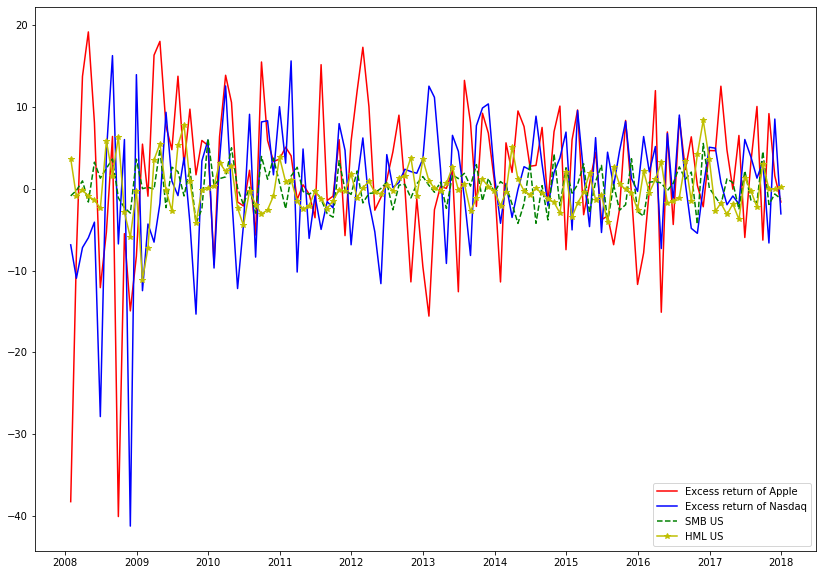

In [70]:
plt.plot(stocks_fama['ex_ret_Apple'], 'r-', label='Excess return of Apple')
plt.plot(stocks_fama['ex_ret_Nasdaq'], 'b-', label='Excess return of Nasdaq')
plt.plot(stocks_fama['smb'], 'g--', label='SMB US')
plt.plot(stocks_fama['hml'], 'y-*', label='HML US')
plt.legend(loc='lower right')
plt.savefig('Apple_Nasdaq_SMB_HML.png', bbox_inches='tight')
plt.show()

In [71]:
import statsmodels.formula.api as smf

In [72]:
model = smf.ols(formula='ex_ret_Apple~ex_ret_Nasdaq+smb+hml', data=stocks_fama)

In [73]:
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 12, 'use_correction':True})

In [74]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ex_ret_Apple   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.457
Date:                Thu, 27 Jun 2019   Prob (F-statistic):             0.0665
Time:                        07:05:31   Log-Likelihood:                -430.31
No. Observations:                 120   AIC:                             868.6
Df Residuals:                     116   BIC:                             879.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3401      0.949      1.412